In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)

%matplotlib inline

In [3]:
from google.colab import drive
import os 
drive.mount ('/content/gdrive') 

Mounted at /content/gdrive



Juegos Olímpicos: Revisar la performance de los distintos países en cada deporte y su  evolución en el tiempo para estimar los medalleros futuros





In [4]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


In [5]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [6]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


**Vemos la información del dataframe para encontrar valores nulos**

In [7]:
print(df_atletas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None



**Limpieza de datos. Calculamos la media para reemplazar los valores en 0 (cero) de las columnas "Age", "Height" y "Weight". En la columna "Medal" se reemplazan los valores NA con "sin medalla"**

In [8]:
x = df_atletas["Age"].mean()

df_atletas["Age"].fillna(x, inplace = True)

In [9]:
x = df_atletas["Height"].mean()

df_atletas["Height"].fillna(x, inplace = True)

In [10]:
x = df_atletas["Weight"].mean()

df_atletas["Weight"].fillna(x, inplace = True)

In [11]:
x = df_atletas["Medal"]

df_atletas["Medal"].fillna('sin medalla', inplace = True)

In [12]:
df_atletas["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

**Corroboramos el reemplazo**

In [13]:
print(df_atletas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [14]:
x = df_atletas["Medal"]

df_atletas["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

**Corroboramos el cambio en el Dataframe**

In [15]:
df_atletas

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.00000,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


### **MATPLOTLIB**

**Miramos la columna "Medal"**

In [16]:
Medallas=df_atletas['Medal']
Medallas

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

**Agrupamos las medallas por país**

In [17]:
Medallas=df_atletas[['Medal','Team']].groupby(by='Team').count()
Medallas

,Medal
Team,
30. Februar,2
A North American Team,4
Acipactli,3
Acturus,2
Afghanistan,126
...,...
Zambia,183
Zefyros,2
Zimbabwe,309


**Buscamos los países que tengan históricamente más de 8000 medallas**

In [18]:
Países_mas_Medalleros=Medallas[Medallas.Medal >8000]

In [19]:
Países_mas_Medalleros

,Medal
Team,
Canada,9279
France,11988
Germany,9326
Great Britain,11404
Italy,10260
Japan,8289
Sweden,8052
United States,17847


**Hacemos la gráfica**

In [20]:
x = np.array(["Canada", "France", "Germany", "Great Britain", "Italy", "Japan", "Sweden", "United States"])
y = np.array([9279, 11988, 9326, 11404, 10260, 8289, 8052, 17847])

Text(0.5, 0, 'Países')

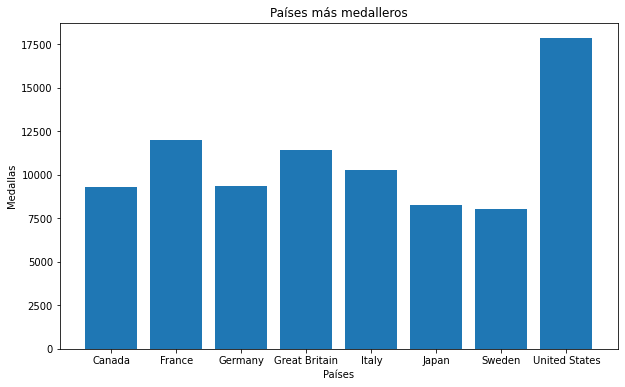

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y)
ax.set_title('Países más medalleros')
ax.set_ylabel('Medallas')
ax.set_xlabel('Países')

Descripción del gráfico de barras: EEUU es el país que mayor cantidad de medallas ha obtenido. 

**Agrupamos las medallas por sexo de los atletas**

In [22]:
Medallas_por_Sexo=df_atletas[['Medal','Sex']].groupby(by='Sex').count()
Medallas_por_Sexo

,Medal
Sex,
F,74522
M,196594


**Hacemos la gráfica**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


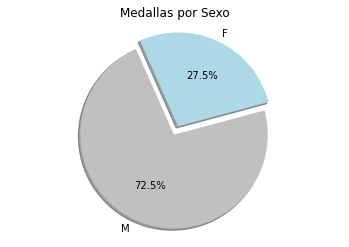

In [23]:
my_labels = 'F','M'
my_colors = ['lightblue','silver']
my_explode = (0, 0.1)
plt.pie(Medallas_por_Sexo,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Medallas por Sexo')
plt.axis('equal')
plt.show()

Descripción del gráfico de torta: Históricamente, en las Olimpiadas, los atletas hombres obtienen casi el triple de medallas respecto de las mujeres.

**Altura Versus Peso de los atletas**

**Definimos 2 series "Altura" y "Peso"**

In [24]:
altura=df_atletas['Height']
peso=df_atletas['Weight']

**Hacemos la gráfica**

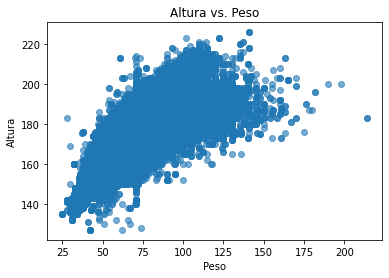

In [25]:
fig, ax = plt.subplots()
ax.scatter(peso, altura, alpha=0.6) 
ax.set_title('Altura vs. Peso')
ax.set_xlabel('Peso')
ax.set_ylabel('Altura')
plt.show()

Descripción del gráfico de dipsersión: Se visualiza uan relación directa entre el peso y la edad de los atletas.



## **SEABORN**

**Traemos nuevamente el Dataframe df_ateltas**

In [ ]:
df_atletas

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.00000,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


**Fitramos sólo los registros con medallas**

In [ ]:
df_atletas[df_atletas.Medal != "sin medalla"]

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,...,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,175.33897,...,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,...,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.00000,...,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00000,...,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00000,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.00000,...,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.00000,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


**Nombramos al dataframe filtrado como "Países_con_Medallas"**

In [ ]:
Países_con_Medallas=df_atletas[df_atletas.Medal != "sin medalla"]
Países_con_Medallas

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,...,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,175.33897,...,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,...,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.00000,...,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00000,...,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00000,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.00000,...,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.00000,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


**Creamos un Dataframe de la performance de EEUU**

In [ ]:
Medallero_EEUU=Países_con_Medallas[Países_con_Medallas.Team == "United States"]

In [ ]:
Medallero_EEUU

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
186,84,Stephen Anthony Abas,M,26.0,165.00000,...,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
278,145,Jeremy Abbott,M,28.0,175.00000,...,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
283,150,Margaret Ives Abbott (-Dunne),F,23.0,175.33897,...,Summer,Paris,Golf,Golf Women's Individual,Gold
286,153,Monica Cecilia Abbott,F,23.0,191.00000,...,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,165,Nia Nicole Abdallah,F,20.0,175.00000,...,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
...,...,...,...,...,...,...,...,...,...,...,...
269922,135045,Rbert Zimonyi,M,46.0,170.00000,...,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold
270058,135103,"Albert Conrad ""Al"" Zirkel",M,19.0,175.33897,...,Summer,St. Louis,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze
270182,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.00000,...,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze
270220,135184,"Jacqueline Jean ""Jackie"" Zoch",F,27.0,180.00000,...,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Bronze


**Creamos el Dataframe Med_EEUU**

In [ ]:
Med_EEUU=Medallero_EEUU [['Sex', 'Year' , 'Medal', 'Sport', 'Age']].groupby(by=[ 'Sex','Year','Medal', 'Age']).count().reset_index() 


In [ ]:
Med_EEUU

,Sex,Year,Medal,Age,Sport
0,F,1900,Bronze,20.0,1
1,F,1900,Bronze,41.0,1
2,F,1900,Gold,23.0,1
3,F,1900,Silver,23.0,1
4,F,1904,Bronze,63.0,2
...,...,...,...,...,...
2009,M,2016,Silver,30.0,1
2010,M,2016,Silver,31.0,1
2011,M,2016,Silver,34.0,1
2012,M,2016,Silver,35.0,1


**Creamos una gráfica de dispersión para visualizar la relación entre la cantidad de medallas obtenidas y la edad de los atletas, por sexo**

In [ ]:
Med_Edad= Med_EEUU[['Medal', 'Sport', 'Age']].groupby(by=['Medal', 'Age']).count().reset_index()

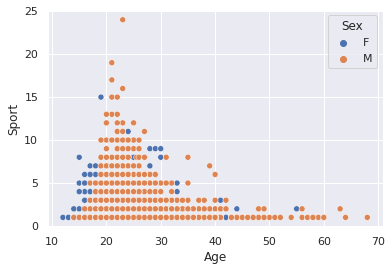

In [ ]:
sns.scatterplot(x="Age", y="Sport", hue="Sex", data=Med_EEUU)

**Creamos una gráfica de línea para visualizar la evolución entre la cantidad de medallas obtenidas y la edad de los atletas, por sexo.**

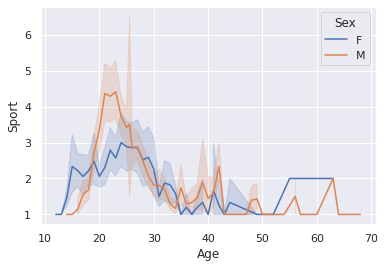

In [ ]:
sns.lineplot(data=Med_EEUU, x="Age", y="Sport", hue="Sex")

Descripción de gráfico de dispersión y de línea: En el eje x se grafica la edad de los atletas y en el eje y la cantidad de medallas obtenidas. Vemos que la mayoría de los atletas tienen su mejor performance entre los 15 y 35 años y que las mujeres suelen alcanzar medallas con menor edad.

**Graficamos un gráfico de barras para visualizar la cantidad de medallas de EEUU por color de medalla y por sexo**

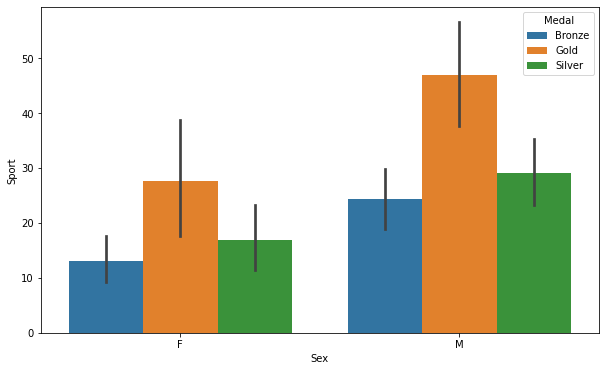

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y='Sport',x='Sex',hue='Medal',data=Med_EEUU)

Descripción del gráfico de barras: Históricamente los atletas hombre de EEUU han obtenido casi el doble de medallas que las atletas mujeres, para todos los colores de preseas.

**Graficamos la evolución del medallero de EEUU por color de medalla**

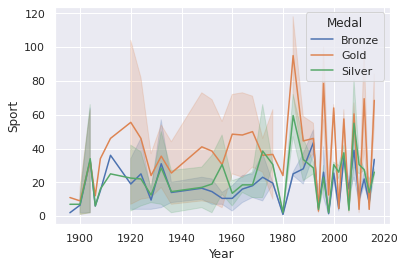

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year" , y="Sport", hue="Medal",data=Med_EEUU)

Descripción del gráfico de línea por color de medalla: Se visualiza que históricamente los atletas de EEUU han obtenido mayor cantidad de medallas doradas y que a partir de los años 90 la performance ha mejorado. 